# Housing Market Analysis: London Case

Description: Historical prices, sales, crimes, resident satisfaction and salaries by borough.

## Content

[The datasets](https://www.kaggle.com/datasets/justinas/housing-in-london) is primarily centered around the housing market of London. However, it contains a lot of additional relevant data:

- Monthly average house prices
- Yearly number of houses
- Yearly number of houses sold
- Yearly percentage of households that recycle
- Yearly life satisfaction
- Yearly median salary of the residents of the area
- Yearly mean salary of the residents of the area
- Monthly number of crimes committed
- Yearly number of jobs
- Yearly number of people living in the area
- Area size in hectares

The data is split by areas of London called boroughs (a flag exists to identify these), but some of the variables have other geographical UK regions for reference (like England, North East, etc.). There have been no changes made to the data except for melting it into a long format from the original tables.

#### DataFrames
- df: main dataframe
- london_df: london boroughs
- region_df: regions of UK

## Package Installation

In [ ]:
!pip install dtale

## Importing Libraries

In [1]:
import pandas as pd
import dtale
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Read Dataset

In [2]:
df = pd.read_csv("assets/input/housing_in_london_yearly_variables.csv")

## View & Analyze

In [3]:
dtale.show(df)

## Data Cleaning

In [4]:
# Count the number of missing rows
df.isna().sum()

code                   0
area                   0
date                   0
median_salary         22
life_satisfaction    719
mean_salary            0
recycling_pct        211
population_size       53
number_of_jobs       140
area_size            405
no_of_houses         405
borough_flag           0
dtype: int64

### Median Salary

In [5]:
# Calculate the mean of "median_salary" column
median_salary_mean = df["median_salary"].mean()

# Fill null values with the mean
df["median_salary"].fillna(median_salary_mean, inplace=True)

# Calculate the total number of null values in "median_salary" column
median_salary_null_count = df["median_salary"].isnull().sum()

### Life Satisfaction

In [6]:
# Calculate the total number of null values in "life_satisfaction" column
life_satisfaction_null_count = df["life_satisfaction"].isnull().sum()

# Fill NaN values with random values between 6.5 and 7 because the value is 6.8 in OECD Better Life Index
df['life_satisfaction'].fillna(pd.Series(np.random.uniform(6.5, 7, size=len(df))), inplace=True)

### Mean Salary

In [7]:
# Convert non-numeric values to NaN in the 'mean_salary' column
df['mean_salary'] = pd.to_numeric(df['mean_salary'], errors='coerce')

# Convert the 'mean_salary' column to float data type
df['mean_salary'] = df['mean_salary'].astype(float)

# Check the new data type of the 'mean_salary' column
print("New data type of 'mean_salary' column:", df['mean_salary'].dtype)

New data type of 'mean_salary' column: float64


In [8]:
# Calculate the total number of null values in "mean_salary" column
mean_salary_null_count = df["mean_salary"].isnull().sum()

# Calculate the mean of "mean_salary" column
mean_salary_mean = df["mean_salary"].mean()

# Fill null values with the mean
df["mean_salary"].fillna(mean_salary_mean, inplace=True)

In [9]:
# Get all distinct values from the 'area' column
distinct_area_names = df['area'].unique()
distinct_area_names

array(['city of london', 'barking and dagenham', 'barnet', 'bexley',
       'brent', 'bromley', 'camden', 'croydon', 'ealing', 'enfield',
       'greenwich', 'hackney', 'hammersmith and fulham', 'haringey',
       'harrow', 'havering', 'hillingdon', 'hounslow', 'islington',
       'kensington and chelsea', 'kingston upon thames', 'lambeth',
       'lewisham', 'merton', 'newham', 'redbridge',
       'richmond upon thames', 'southwark', 'sutton', 'tower hamlets',
       'waltham forest', 'wandsworth', 'westminster', 'north east',
       'north west', 'yorkshire and the humber', 'east midlands',
       'west midlands', 'east', 'london', 'south east', 'south west',
       'inner london', 'outer london', 'england', 'united kingdom',
       'great britain', 'england and wales', 'northern ireland',
       'scotland', 'wales'], dtype=object)

In [10]:
# Concatenate 'region_df' and 'london_df' into a single DataFrame
# combined_df = pd.concat([region_df, london_df], ignore_index=True)

# Find the rows in 'df' that are not in 'combined_df'
# different_rows = df[~df['area'].isin(combined_df['area'])]

# Get distinct values in the 'area' column of 'different_rows'
# distinct_areas_in_different_rows = different_rows['area'].unique()
# distinct_areas_in_different_rows

### Recycling Percentage

In [10]:
# Convert the "recycling_pct" column to numeric type
df["recycling_pct"] = pd.to_numeric(df["recycling_pct"], errors="coerce")

# Print the updated data type of the column
df["recycling_pct"].dtypes

# Group the DataFrame by "area" and calculate the mean recycling percentage for each area
mean_recycling_pct = df.groupby("area")["recycling_pct"].mean()

# Convert Series to DataFrame
mean_recycling_pct = mean_recycling_pct.reset_index()

# Merging DataFrames based on the 'city' column (common key)
df = df.merge(mean_recycling_pct, on='area', how='left')

In [11]:
# Fill NaN values in "recycling_pct_x" with values from "recycling_pct_y"
df['recycling_pct_x'] = df['recycling_pct_x'].fillna(df['recycling_pct_y'])

# Calculate the median of "recycling_pct_x" column
recycling_pct_x_median = df['recycling_pct_x'].median()

# Fill NaN values in "recycling_pct_x" column with the median value
df['recycling_pct_x'] = df['recycling_pct_x'].fillna(recycling_pct_x_median)

### Population Size

In [12]:
# Getting population size data by year
pop_size = pd.read_csv("assets/input/population_size.csv")

# List of columns to drop
columns_to_drop = ["sample", "2001", "2011", "2021", "Data.1"]

# Drop the specified columns from the DataFrame
pop_size.drop(columns=columns_to_drop, inplace=True)

In [13]:
# Merging DataFrames based on the 'city' column (common key)
df = df.merge(pop_size, on='area', how='left')

# Rename the columns as required
df.rename(columns={
    "recycling_pct_x": "recycling_pct",
    "recycling_pct_y": "mean_recycle_pct",
    "Data": "extended_pop_size"
}, inplace=True)

In [14]:
# Identify rows where "population_size" is NaN
mask = df['population_size'].isnull()

# Fill NaN values in "population_size" column with corresponding values from "extended_pop_size"
df.loc[mask, 'population_size'] = df.loc[mask, 'extended_pop_size']

In [15]:
# Only 22 rows have NaN values in population_size column
# Remove commas and convert the "population_size" column to numeric
df['population_size'] = pd.to_numeric(df['population_size'].replace(',', '', regex=True), errors='coerce')

# Calculate the median of the "population_size" column
median_population_size = df['population_size'].median()

# Fill NaN values in "population_size" column with the median value
df['population_size'].fillna(median_population_size, inplace=True)

### Number of Jobs

In [16]:
# Only 42 out of 140 NaN value remained
# Getting number of jobs data from csv
total_jobs = pd.read_csv("assets/input/number_of_jobs.csv")

# List of columns to drop
columns_to_drop = ["name", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021"]

# Drop the specified columns from the DataFrame
total_jobs.drop(columns=columns_to_drop, inplace=True)

# Merging DataFrames based on the 'city' column (common key)
df = df.merge(total_jobs, on='area', how='left')

# Identify rows where "population_size" is NaN
mask = df['number_of_jobs'].isnull()

# Fill NaN values in "population_size" column with corresponding values from "extended_pop_size"
df.loc[mask, 'number_of_jobs'] = df.loc[mask, 'number_of_jobs_mean']

In [17]:
# Remove commas and convert the "number_of_jobs" column to numeric
df['number_of_jobs'] = pd.to_numeric(df['number_of_jobs'].str.replace(',', ''), errors='coerce')

# Calculate the median of the "number_of_jobs" column
median_number_of_jobs = df['number_of_jobs'].median()

# Fill NaN values in "number_of_jobs" column with the median value
df['number_of_jobs'].fillna(median_number_of_jobs, inplace=True)

### Area Size

In [18]:
# Only 105 out of 405 NaN value remained
# The correlation of 0.621 between population_size & area_size indicates a positive moderate-strong relationship.

# Rows where "area_size" column is not empty
non_empty_rows = df[df['area_size'].notna()]

# Only 42 out of 140 NaN value remained
# Getting number of jobs data from csv
total_hectar = pd.read_csv("assets/input/total_hectar.csv")

# List of columns to drop
columns_to_drop = ["sample"]

# Drop the specified columns from the DataFrame
total_hectar.drop(columns=columns_to_drop, inplace=True)

# Merging DataFrames based on the 'city' column (common key)
df = df.merge(total_hectar, on='area', how='left')

# Identify rows where "population_size" is NaN
mask = df['area_size'].isnull()

# Fill NaN values in "population_size" column with corresponding values from "extended_pop_size"
df.loc[mask, 'area_size'] = df.loc[mask, 'total_hectar']

In [19]:
# Remove commas and convert the "area_size" column to numeric
df['area_size'] = pd.to_numeric(df['area_size'].str.replace(',', ''), errors='coerce')

# Calculate the median of the "area_size" column
median_number_of_jobs = df['area_size'].median()

# Fill NaN values in "area_size" column with the median value
df['area_size'].fillna(median_number_of_jobs, inplace=True)

### Number of Houses

In [25]:
# Calculating person per house
# df['persons_per_house'] = df['population_size'] / df['no_of_houses']

In [20]:
# Fill NaN values in "no_of_houses" column with 0 - There is no number of house data for UK Regions
df["no_of_houses"].fillna(0, inplace=True)

### Dataframe Extraction

#### London Boroughs

In [21]:
# The list of values you want to keep
london_values = ['city of london', 'barking and dagenham', 'barnet', 'bexley', 'brent', 'bromley', 'camden', 'croydon', 'ealing', 'enfield',
                  'greenwich', 'hackney', 'hammersmith and fulham', 'haringey', 'harrow', 'havering', 'hillingdon', 'hounslow', 'islington',
                  'kensington and chelsea', 'kingston upon thames', 'lambeth', 'lewisham', 'merton', 'newham', 'redbridge',
                  'richmond upon thames', 'southwark', 'sutton', 'tower hamlets', 'waltham forest', 'wandsworth', 'westminster']

# Filter the DataFrame to keep only rows with the desired values in the 'area' column
london_df = df[df['area'].isin(london_values)]

#### UK Regions

In [22]:
# The list of values you want to keep
region_values = ['north east', 'north west', 'yorkshire and the humber', 'east midlands', 'west midlands', 'east',
                  'south east', 'south west', 'england', 'united kingdom', 'great britain', 'england and wales',
                  'northern ireland', 'scotland', 'wales', "inner london", "outer london", "london"]

# Filter the DataFrame to keep only rows with the desired values in the 'area' column
region_df = df[df['area'].isin(region_values)]

## Questions

### 1- Is there a correlation between the median salary and the life satisfaction for residents in London's boroughs?

- The correlation coefficient of -0.21936922410940793 suggests a weak negative correlation between "median_salary" and "life_satisfaction" in the dataset.

- Cost of living: London's high living costs might lead to higher salaries but potentially reduced life satisfaction due to financial stress.

- Work-life balance: Demanding jobs with higher salaries may lead to decreased life satisfaction if individuals experience limited leisure time or increased stress levels.

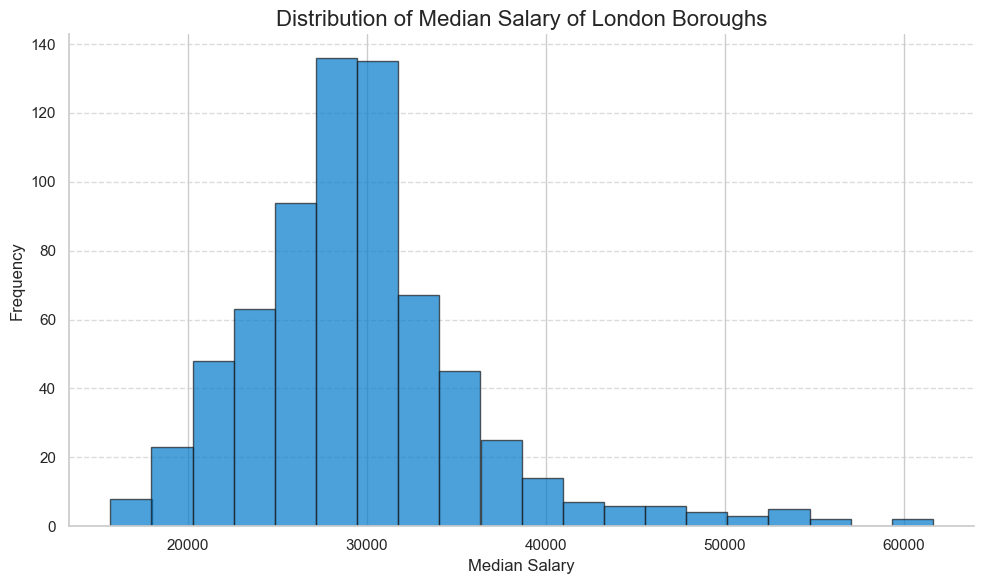

In [23]:
# Set up seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create the histogram with customizations
plt.figure(figsize=(10, 6))
plt.hist(london_df["median_salary"], bins=20, color="#007acc", edgecolor="k", alpha=0.7)

# Add labels and title
plt.xlabel("Median Salary")
plt.ylabel("Frequency")
plt.title("Distribution of Median Salary of London Boroughs", fontsize=16)

# Add grid lines for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Remove the right and top spines for cleaner look
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

# Add a legend (optional) - if you have relevant data, like source or data year
#plt.legend(["2022 Data"])

# Show the plot
plt.tight_layout()
plt.show()

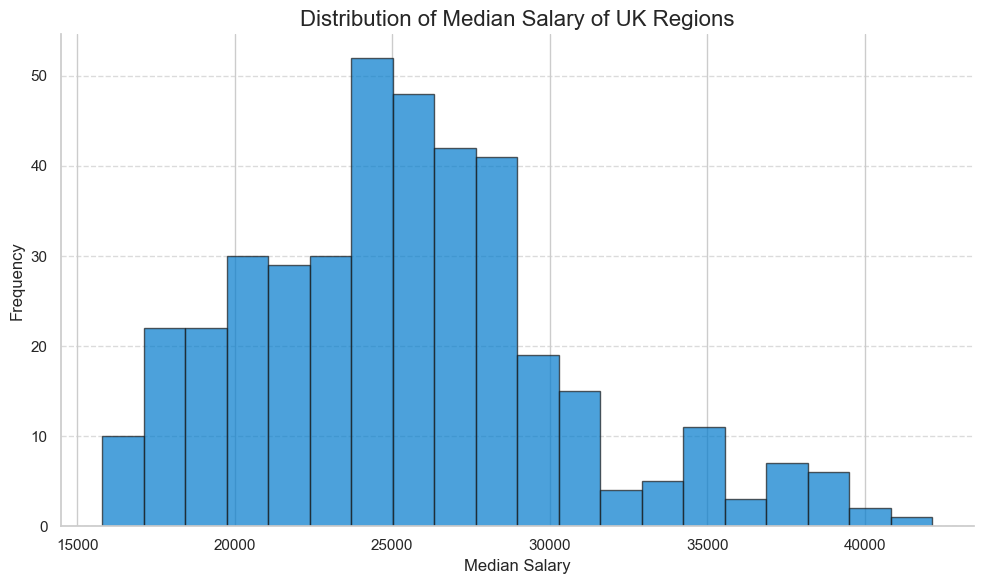

In [24]:
# Set up seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create the histogram with customizations
plt.figure(figsize=(10, 6))
plt.hist(region_df["median_salary"], bins=20, color="#007acc", edgecolor="k", alpha=0.7)

# Add labels and title
plt.xlabel("Median Salary")
plt.ylabel("Frequency")
plt.title("Distribution of Median Salary of UK Regions", fontsize=16)

# Add grid lines for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Remove the right and top spines for cleaner look
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

# Add a legend (optional) - if you have relevant data, like source or data year
#plt.legend(["2022 Data"])

# Show the plot
plt.tight_layout()
plt.show()

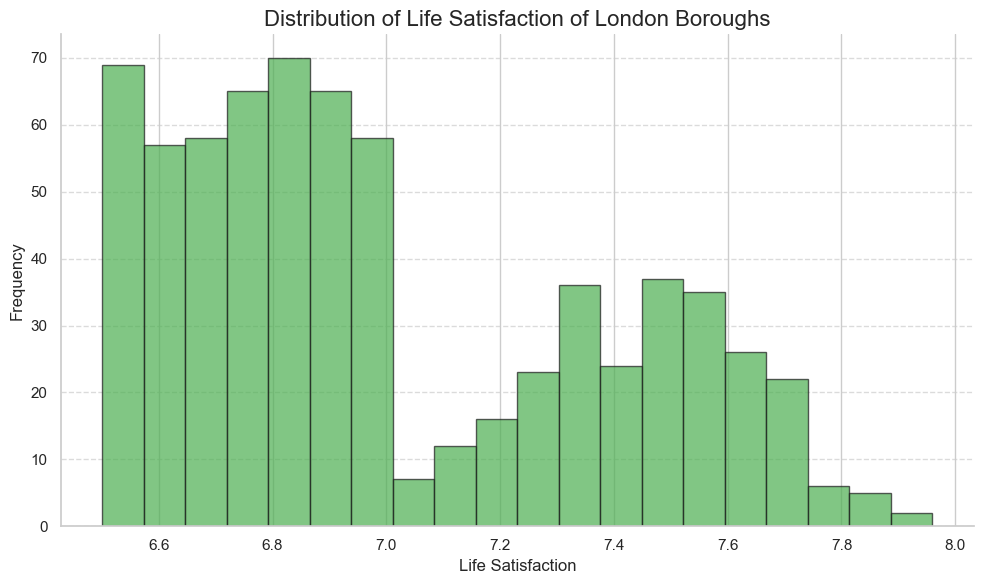

In [25]:
# Set up seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create the histogram with customizations
plt.figure(figsize=(10, 6))
plt.hist(london_df["life_satisfaction"], bins=20, color="#4caf50", edgecolor="k", alpha=0.7)

# Add labels and title
plt.xlabel("Life Satisfaction")
plt.ylabel("Frequency")
plt.title("Distribution of Life Satisfaction of London Boroughs", fontsize=16)

# Add grid lines for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Remove the right and top spines for cleaner look
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

# Add a legend (optional) - if you have relevant data, like source or data year
# plt.legend(["2022 Data"])

# Show the plot
plt.tight_layout()
plt.show()

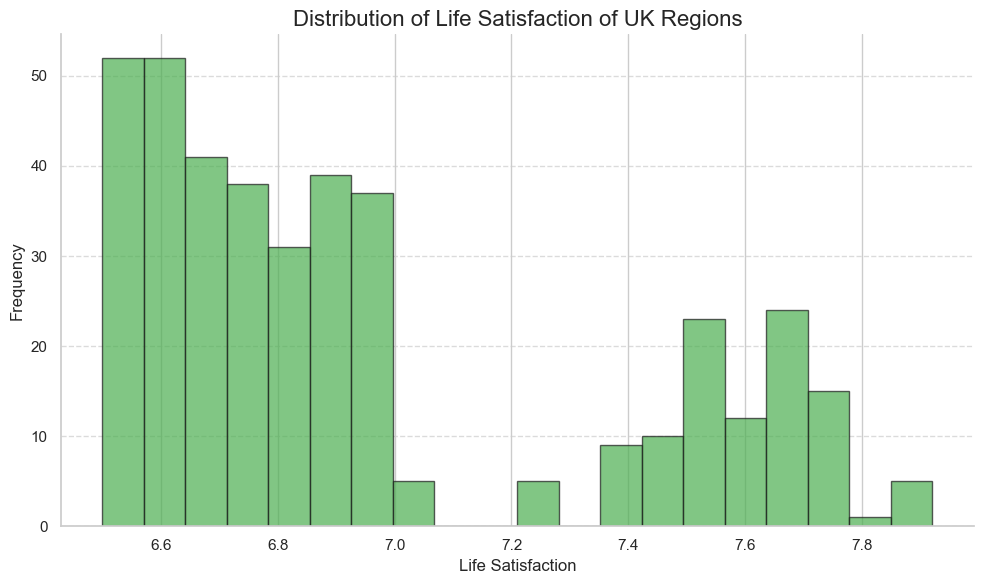

In [26]:
# Set up seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create the histogram with customizations
plt.figure(figsize=(10, 6))
plt.hist(region_df["life_satisfaction"], bins=20, color="#4caf50", edgecolor="k", alpha=0.7)

# Add labels and title
plt.xlabel("Life Satisfaction")
plt.ylabel("Frequency")
plt.title("Distribution of Life Satisfaction of UK Regions", fontsize=16)

# Add grid lines for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Remove the right and top spines for cleaner look
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

# Add a legend (optional) - if you have relevant data, like source or data year
# plt.legend(["2022 Data"])

# Show the plot
plt.tight_layout()
plt.show()

In [27]:
# Calculate the Spearman's rank correlation coefficient between "median_salary" and "life_satisfaction"
correlation_coefficient = df["median_salary"].corr(df["life_satisfaction"], method="spearman")
correlation_coefficient

0.2785042489897907

### 2- How does the recycling percentage vary across different boroughs of London? Are there any patterns or trends?

- Out of the 20 boroughs, the average recycling rate is above 26.9%.

- A correlation coefficient of 0.12 should be interpreted as a weak positive correlation between the mean_salary and recycle_pct_x being compared.

- The recycling rate increased until 2012, then entered a plateau phase, and in 2020, there was a drastic decline. The COVID-19 pandemic could have disrupted recycling operations and collection services. With lockdowns and social distancing measures, people might have been more reliant on single-use products, leading to increased waste generation.

- London 2012 won gold in the Environmental and Sustainability category at the 6th International Sports Event Management awards. However, after the success of the 2012 Olympics, priorities may have shifted, and there could have been a decrease in financial and political support for recycling projects. This reduction in investments may have affected the effectiveness and capacity of recycling activities.

In [28]:
# Remove any rows with missing values (NaN)
mean_recycling_pct = mean_recycling_pct.dropna(subset=['recycling_pct'])

# Sort the data in descending order based on the mean of 'recycling_pct' column
mean_recycling_pct = mean_recycling_pct.sort_values(by='recycling_pct', ascending=False)

# Calculate the mean of 'recycling_pct' column
mean_value = mean_recycling_pct['recycling_pct'].mean()

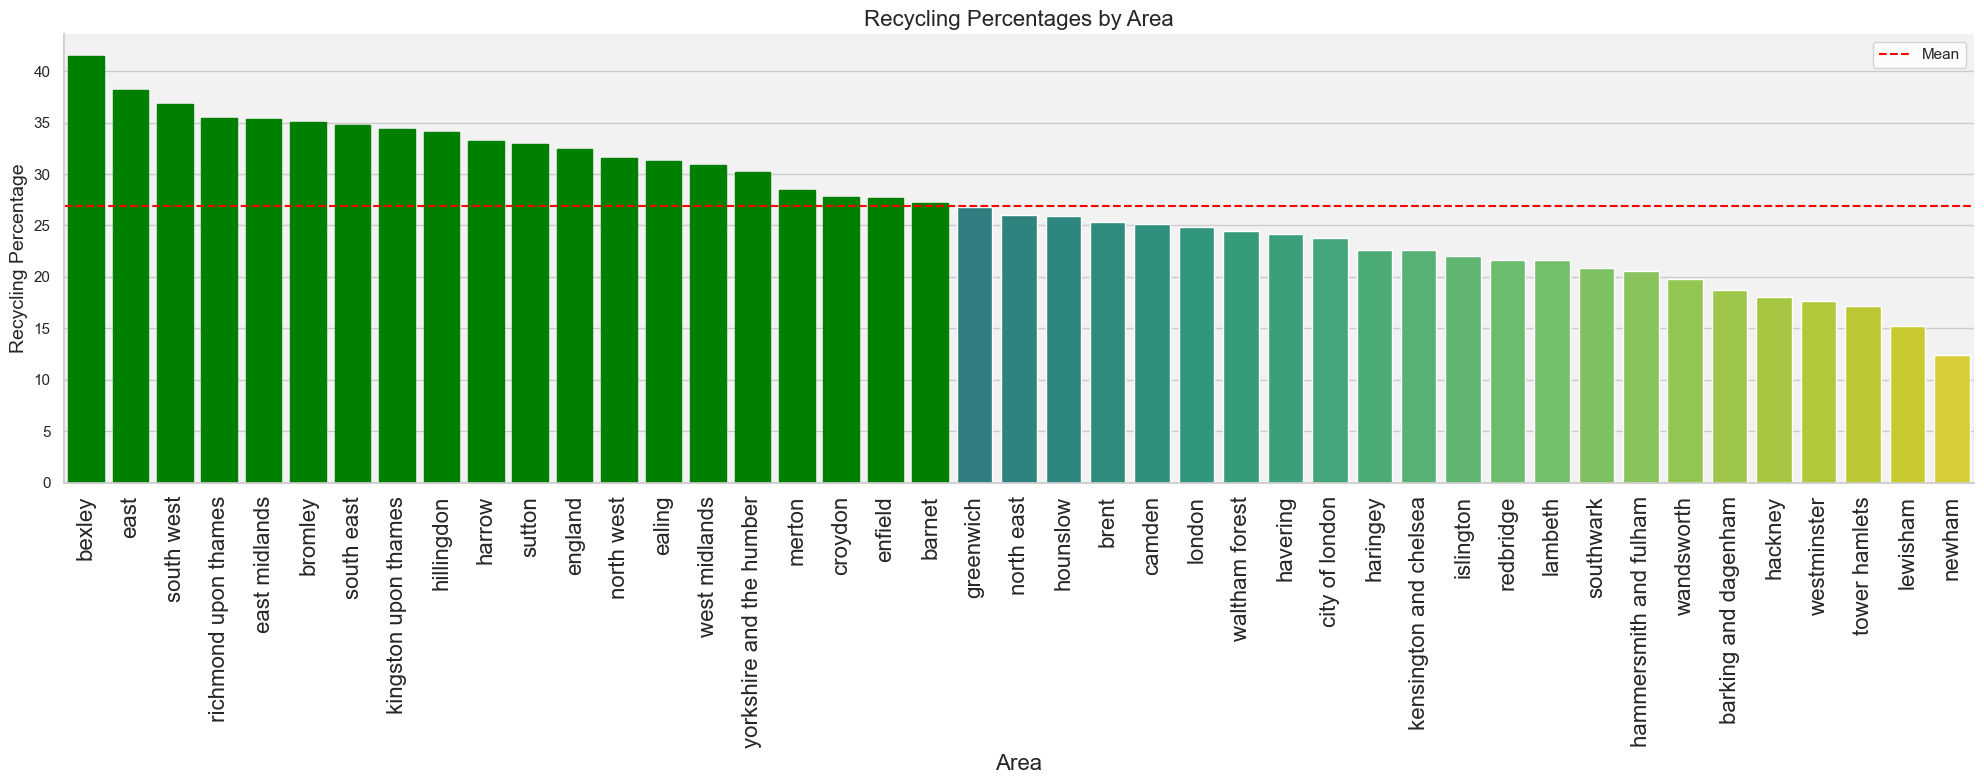

In [29]:
# Set up seaborn style for better aesthetics
sns.set(style="whitegrid")

# Plot the histogram
plt.figure(figsize=(20, 8))
bars = sns.barplot(x='area', y='recycling_pct', data=mean_recycling_pct, palette='viridis')

# Color bars above the mean line in green
for bar in bars.patches:
    if bar.get_height() > mean_value:
        bar.set_color('green')

# Add the mean line
plt.axhline(mean_value, color='red', linestyle='dashed', label='Mean')

plt.xlabel('Area', fontsize=16)
plt.ylabel('Recycling Percentage', fontsize=14)
plt.title('Recycling Percentages by Area', fontsize=16)
plt.xticks(rotation=90, fontsize=16)
plt.legend()
plt.tight_layout()

# Add a background color for the plot (optional)
plt.gca().set_facecolor('#f2f2f2')

# Remove the top and right spines for cleaner look
sns.despine()

plt.show()

In [36]:
# Calculate the mean of the 'recycling_pct_y' column
# mean_recycling_pct_y = df['recycling_pct_x'].mean()

# Fill the NaN values in the 'recycling_pct_y' column with the calculated mean
# df['recycling_pct_x'].fillna(mean_recycling_pct_y, inplace=True)

# has_nan_values = df['recycling_pct_x'].isnull().any()
# has_nan_values

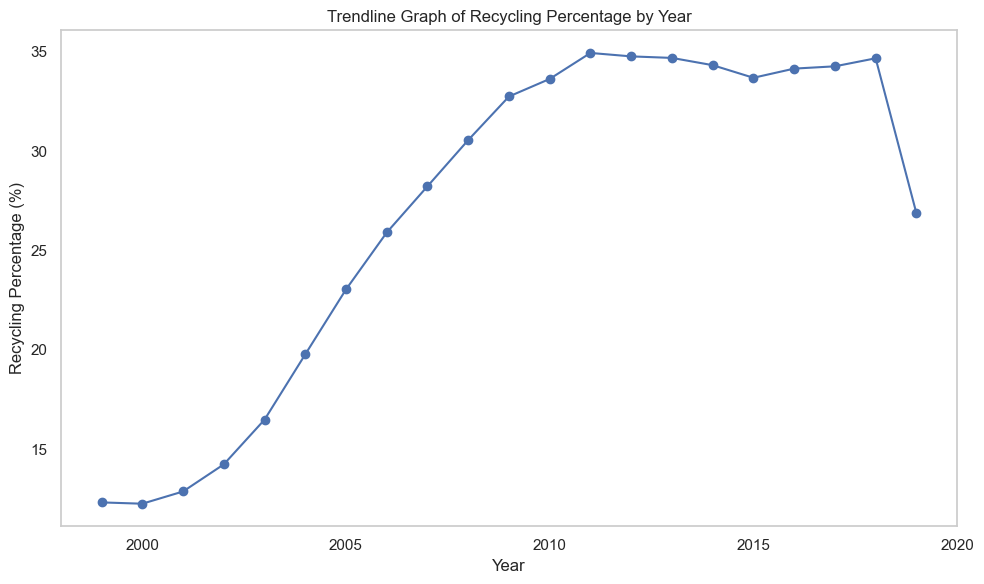

In [30]:
# Convert 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column and create a new 'year' column
df['year'] = df['date'].dt.year

# Group by 'year' and calculate the mean of 'recycling_pct'
grouped_df = df.groupby('year')['recycling_pct'].mean().reset_index()

# Create the trendline graph
plt.figure(figsize=(10, 6))
plt.plot(grouped_df['year'], grouped_df['recycling_pct'], marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Recycling Percentage (%)')
plt.title('Trendline Graph of Recycling Percentage by Year')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(5)) # Show only 5 year ticks on the x-axis
plt.grid(False)
plt.tight_layout()
plt.show()

In [31]:
# Calculate the correlation coefficient between 'mean_salary' and 'recycling_pct_x'
correlation_coefficient = df['mean_salary'].corr(df['recycling_pct'])
correlation_coefficient

0.11151879075530087

In [32]:
# Write London Boroughs data to CSV file
london_df.to_csv('assets/output/london_data.csv', index=False)